In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# Setting the random seed
np.random.seed(14)
random.seed(14)

## Data Pre-processing

In [3]:
df_spotify = pd.read_csv('data/spotify52kData.csv')
df_ratings = pd.read_csv('data/starRatings.csv',header=None)
df_ratings.columns = df_spotify['track_name'].iloc[:5000] # manually specifying the index to be 5000 song names

In [4]:
# Checking for missing values and the data types of each column
missing_values = df_spotify.isnull().sum()
data_types = df_spotify.dtypes
# Overview of the dataset statistics
dataset_statistics = df_spotify.describe(include='all')

missing_values, data_types, dataset_statistics # data set overall is robust

(songNumber          0
 artists             0
 album_name          0
 track_name          0
 popularity          0
 duration            0
 explicit            0
 danceability        0
 energy              0
 key                 0
 loudness            0
 mode                0
 speechiness         0
 acousticness        0
 instrumentalness    0
 liveness            0
 valence             0
 tempo               0
 time_signature      0
 track_genre         0
 dtype: int64,
 songNumber            int64
 artists              object
 album_name           object
 track_name           object
 popularity            int64
 duration              int64
 explicit               bool
 danceability        float64
 energy              float64
 key                   int64
 loudness            float64
 mode                  int64
 speechiness         float64
 acousticness        float64
 instrumentalness    float64
 liveness            float64
 valence             float64
 tempo               float64
 ti

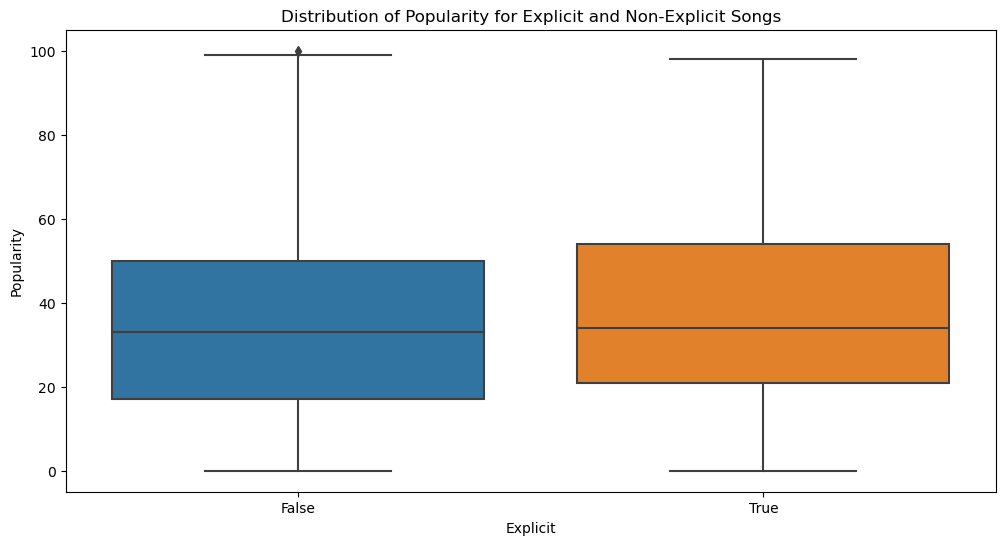

(explicit      0
 popularity    0
 dtype: int64,
 explicit       bool
 popularity    int64
 dtype: object,
 count    5597.000000
 mean       35.813114
 std        22.599548
 min         0.000000
 25%        21.000000
 50%        34.000000
 75%        54.000000
 max        98.000000
 Name: popularity, dtype: float64,
 count    46403.000000
 mean        32.790595
 std         21.615697
 min          0.000000
 25%         17.000000
 50%         33.000000
 75%         50.000000
 max        100.000000
 Name: popularity, dtype: float64)

In [5]:
# Question 2: Are explicitly rated songs more popular than songs that are not explicit? 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene, ttest_ind

# Check for missing values and data types in relevant columns
missing_values = df_spotify[['explicit', 'popularity']].isnull().sum()
data_types = df_spotify[['explicit', 'popularity']].dtypes

# Descriptive statistics for both groups
desc_stats_explicit = df_spotify[df_spotify['explicit'] == True]['popularity'].describe()
desc_stats_non_explicit = df_spotify[df_spotify['explicit'] == False]['popularity'].describe()


plt.figure(figsize=(12, 6))
sns.boxplot(x='explicit', y='popularity', data=df_spotify)
plt.title('Distribution of Popularity for Explicit and Non-Explicit Songs')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.show()

missing_values, data_types, desc_stats_explicit, desc_stats_non_explicit

In [15]:
popularity_explicit = df_spotify[df_spotify['explicit'] == True]['popularity']
popularity_non_explicit = df_spotify[df_spotify['explicit'] == False]['popularity']

# Levene's Test for Homogeneity of variances
levene_test_q2 = levene(popularity_explicit, popularity_non_explicit)
print(f"Q2 levene-test result: {levene_test_q2}") 

# Perform Welch's t-test
t_test_result = ttest_ind(popularity_explicit, popularity_non_explicit, equal_var=False)
print(f"\nQ2 t-test result: {t_test_result}")

Q2 levene-test result: LeveneResult(statistic=16.619770656885425, pvalue=4.574027876730567e-05)

Q2 t-test result: TtestResult(statistic=9.495507012337615, pvalue=2.9549869188182215e-21, df=6888.98867996065)


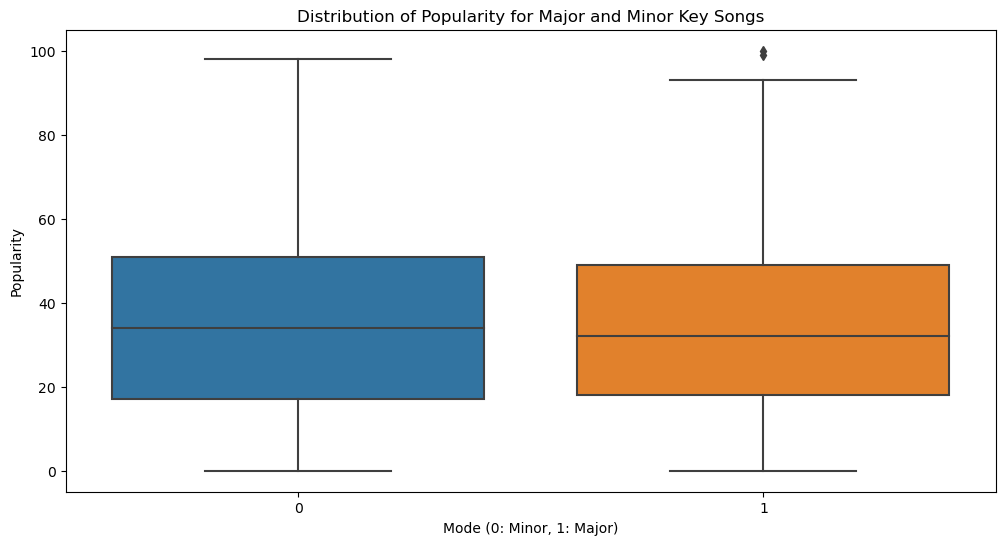

In [22]:
# Question 3: Are songs in major key more popular than songs in minor key?

# Visualize the distributions
plt.figure(figsize=(12, 6))
sns.boxplot(x='mode', y='popularity', data=df_spotify)
plt.title('Distribution of Popularity for Major and Minor Key Songs')
plt.xlabel('Mode (0: Minor, 1: Major)')
plt.ylabel('Popularity')
plt.show()

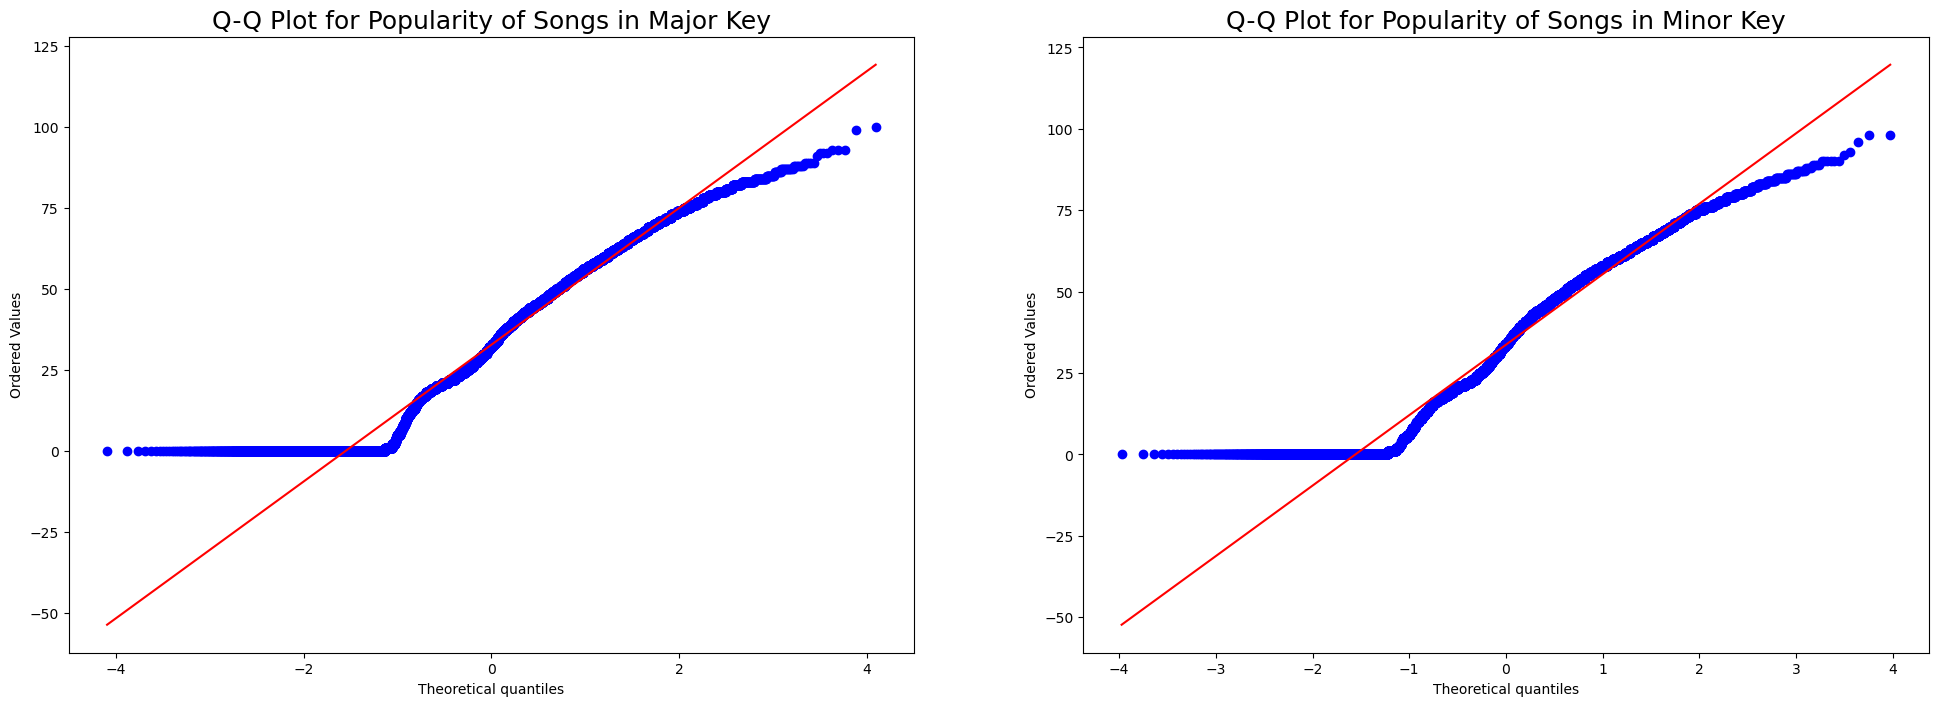

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8)) 

# Q-Q plot for songs in major key
stats.probplot(popularity_major, dist="norm", plot=ax1)
ax1.set_title("Q-Q Plot for Popularity of Songs in Major Key", fontsize = 18)

# Q-Q plot for songs in minor key
stats.probplot(popularity_minor, dist="norm", plot=ax2)
ax2.set_title("Q-Q Plot for Popularity of Songs in Minor Key", fontsize = 18)
plt.show()


In [36]:
# Levene's test
popularity_major = df_spotify[df_spotify['mode'] == 1]['popularity']
popularity_minor = df_spotify[df_spotify['mode'] == 0]['popularity']
levene_test_q3 = levene(popularity_major, popularity_minor)

print(f"Q3 levene-test result: {levene_test_q3}")

# Perform Welch's t-test again after re-importing necessary library
t_test_result = ttest_ind(popularity_major, popularity_minor, equal_var=False)
print(f"\nQ3 t-test result: {t_test_result}")


Q3 levene-test result: LeveneResult(statistic=51.74085604299448, pvalue=6.418259775893402e-13)

Q3 t-test result: TtestResult(statistic=-4.791517372121929, pvalue=1.6610913055004772e-06, df=40576.19476627967)
